In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
from tqdm import tqdm
warnings.filterwarnings('ignore')

import seaborn as sns

## Funções e informações basicas

In [4]:
# retorna a quantidade de valores nulos e a porcentagem de valores nulos em cada coluna.
def valores_nulos_por_cols(dataframe):
    df = dataframe
    cont = 0
    nome_col = []
    quantidade_nulos = []
    porcentagem_nulos = []
    for col in df:
        if df[col].isnull().sum() > 0:
            nome_col.append(col)
            quantidade_nulos.append(df[col].isnull().sum())
            porcentagem_nulos.append(round((df[col].isnull().sum() / len(df) * 100), 3))
            cont += 1 
    
    dados = {'nome_col': nome_col, 'quantidade_nulos': quantidade_nulos, 'porcentagem_nulos': porcentagem_nulos}
    
    df_aux = pd.DataFrame(dados)
    print(f'\nTotal de colunas com valores nulos: {cont}')

    return df_aux #dados

#compara quantas colunas o df secundario possui do df de treino/testes. O df1 é o principal.
def compara_colunas(dataframe1 ,dataframe2):
    # dataframe1 = pd.read_csv('application_train.csv') #sempre será o df principal 
    lista = []
    for coluna in dataframe2:
        if coluna in dataframe1.columns:
            lista.append(coluna)
    print(f'\n.....Numeoro de colunas incomuns com o df principal.....' )
    print(f'Numero colunas presentes no df principal: {len(lista)} \nNome das Colunas:{lista}\n')
    # return lista

def colunas_diferentes(caminho):
    df = pd.read_csv(caminho + '/application_train.csv')
    arqs = os.listdir(caminho)   
    arqs.remove('application_train.csv')
    arqs.remove('application_test.csv')
    # print(len(arqs), type(arqs))
    lista = []
    cont = 0
    for nome in tqdm(arqs):
        cont += 1  
        try:
            df2 = pd.read_csv(caminho + nome, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df2 = pd.read_csv(caminho + nome, encoding='latin1')
            except UnicodeDecodeError:
                df2 = pd.read_csv(caminho + nome, encoding='ISO-8859-1')
        # print (f'Número de Colunas: {len(df2.columns)}')
        print(f'CSV {cont} -> {nome} \nNúmero de colunas df: {df2.shape[1]}') #--> {caminho + i}
        compara_colunas(df, df2)
        # print('--------------------------------------------------')

def informacoes(dataframe):
    print('..... Dimensões do DataFrame .....')
    print(f'Numero de Linhas: {dataframe.shape[0]}')
    print(f'Numero de Colunas: {dataframe.shape[1]}')

    print('\n..... Dados duplicados .....')
    print(f'Linhas duplicadas: {dataframe.duplicated().sum()}')
    
    print('\n..... Informações sobre os valores nulos.....')
    print(f'Total de nulos: {dataframe.isnull().sum().sum()}') # Quantidade de valores nulos
    print(f'Quantidade de linhas com nullos: {dataframe.isnull().any(axis=1).sum()}')
    print(f'Porcentagem de linhas com Nulos: {round(((dataframe.isnull().any(axis=1).sum() )/ len(dataframe)) * 100), 3} %') # Porcentagem linhas com valores nulos
    
    print('\n..... Tipos de Dados .....')   
    colunas_numericas = dataframe.select_dtypes(include=['number']).columns # Identificando variáveis numéricas
    colunas_categoricas = dataframe.select_dtypes(exclude=['number']).columns # Identificando variáveis categóricas (excluindo numéricas)
    # print("\nDivisão do tipo de dados: ")
    print("Variáveis Numéricas")
    print('Quantidade: ',len(colunas_numericas))
    # print()
    # print(colunas_numericas)

    print("\nVariáveis Categóricas")
    print('Quantidade: ',len(colunas_categoricas))
    print()
    # print(colunas_categoricas)

    print("\n.....Estatisiticas Descritivas básicas..... ")
    estatistica = dataframe.describe()
    display(estatistica)
    # return estatistica
    

def info_todos_df(caminho, lista):
    arqs = lista
    cont = 0
    # print(caminho + 'application_train.csv')
    df_principal = pd.read_csv(caminho + 'application_train.csv')
    for nome in tqdm(arqs): 
        try:
            df = pd.read_csv(caminho + nome, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(caminho + nome, encoding='latin1')
            except UnicodeDecodeError:
                df = pd.read_csv(caminho + nome, encoding='ISO-8859-1')
        print(f'CSV {cont} -> {nome}\n ') # \nNúmero de colunas df: {df.shape[1]}--> {caminho + i}
        compara_colunas(df_principal, df)
        informacoes(df)
        
        # if (nome != 'application_train.csv') and (nome != 'application_test.csv'):
        #     print(nome , 'mapa de correlação')
        #     # mapas_correlacao(df)
        
        cont += 1

def lista_arquivos(caminho):
    arqs = os.listdir(caminho)   
    # arqs.remove('application_train.csv')
    # arqs.remove('application_test.csv')
    return arqs

def filtra_colunas(correlacoes):
    # Filtra as correlações entre -0.3 e -0.8 e entre 0.3 e 0.8
    correlacoes_filtradas = correlacoes[((correlacoes >= 0.3) & (correlacoes <= 0.8)) | ((correlacoes <= -0.3) & (correlacoes >= -0.8))]

    # Remove as linhas e colunas que são completamente NaN
    correlacoes_filtradas = correlacoes_filtradas.dropna(how='all').dropna(axis=1, how='all')

    # Exibe as correlações
    
    return correlacoes_filtradas

def transforma_tipo(dataframe):
    # dataframe = dataframe.astype('category')
    for col in dataframe:
        if dataframe[col].dtype == 'int64':
            dataframe[col] = dataframe[col].astype('int32')
        elif dataframe[col].dtype == 'float64':
            dataframe[col] = dataframe[col].astype('float32')
        elif dataframe[col].dtype == 'object':
            dataframe[col] = dataframe[col].astype('category')
    return dataframe

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [5]:
# caminho = '\\Users\\lucas\\OneDrive\\LINUX\\sprint8\\projeto3\\projeto\\data'
caminho = '.\\data\\'
# caminho

In [6]:
lista_de_dfs= lista_arquivos(caminho)
# print(lista_de_dfs)

In [7]:
info_todos_df(caminho, lista_de_dfs)

  0%|          | 0/10 [00:00<?, ?it/s]

CSV 0 -> application_test.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 121 
Nome das Colunas:['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1'

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


 10%|█         | 1/10 [00:01<00:09,  1.07s/it]

CSV 1 -> application_train.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 122 
Nome das Colunas:['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EX

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


 20%|██        | 2/10 [00:08<00:40,  5.04s/it]

CSV 2 -> bureau.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 2 
Nome das Colunas:['SK_ID_CURR', 'AMT_ANNUITY']

..... Dimensões do DataFrame .....
Numero de Linhas: 1716428
Numero de Colunas: 17

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 3939947
Quantidade de linhas com nullos: 1676762
Porcentagem de linhas com Nulos: (98, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  14

Variáveis Categóricas
Quantidade:  3


.....Estatisiticas Descritivas básicas..... 


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


 30%|███       | 3/10 [00:15<00:39,  5.58s/it]

CSV 3 -> bureau_balance.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 0 
Nome das Colunas:[]

..... Dimensões do DataFrame .....
Numero de Linhas: 27299925
Numero de Colunas: 3

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 0
Quantidade de linhas com nullos: 0
Porcentagem de linhas com Nulos: (0, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  2

Variáveis Categóricas
Quantidade:  1


.....Estatisiticas Descritivas básicas..... 


,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


 40%|████      | 4/10 [00:37<01:12, 12.14s/it]

CSV 4 -> credit_card_balance.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 1 
Nome das Colunas:['SK_ID_CURR']

..... Dimensões do DataFrame .....
Numero de Linhas: 3840312
Numero de Colunas: 23

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 5877356
Quantidade de linhas com nullos: 826036
Porcentagem de linhas com Nulos: (22, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  22

Variáveis Categóricas
Quantidade:  1


.....Estatisiticas Descritivas básicas..... 


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


 50%|█████     | 5/10 [00:54<01:09, 13.95s/it]

CSV 5 -> HomeCredit_columns_description.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 0 
Nome das Colunas:[]

..... Dimensões do DataFrame .....
Numero de Linhas: 219
Numero de Colunas: 5

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 133
Quantidade de linhas com nullos: 133
Porcentagem de linhas com Nulos: (61, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  1

Variáveis Categóricas
Quantidade:  4


.....Estatisiticas Descritivas básicas..... 


,Unnamed: 0
count,219.000000
mean,111.981735
std,63.395726
min,1.000000
25%,57.500000
50%,112.000000
75%,166.500000
max,221.000000


 60%|██████    | 6/10 [00:54<00:37,  9.26s/it]

CSV 6 -> installments_payments.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 1 
Nome das Colunas:['SK_ID_CURR']

..... Dimensões do DataFrame .....
Numero de Linhas: 13605401
Numero de Colunas: 8

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 5810
Quantidade de linhas com nullos: 2905
Porcentagem de linhas com Nulos: (0, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  8

Variáveis Categóricas
Quantidade:  0


.....Estatisiticas Descritivas básicas..... 


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


 70%|███████   | 7/10 [01:30<00:54, 18.06s/it]

CSV 7 -> POS_CASH_balance.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 1 
Nome das Colunas:['SK_ID_CURR']

..... Dimensões do DataFrame .....
Numero de Linhas: 10001358
Numero de Colunas: 8

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 52158
Quantidade de linhas com nullos: 26184
Porcentagem de linhas com Nulos: (0, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  7

Variáveis Categóricas
Quantidade:  1


.....Estatisiticas Descritivas básicas..... 


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


 80%|████████  | 8/10 [01:47<00:35, 17.74s/it]

CSV 8 -> previous_application.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 8 
Nome das Colunas:['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE']

..... Dimensões do DataFrame .....
Numero de Linhas: 1670214
Numero de Colunas: 37

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 11109336
Quantidade de linhas com nullos: 1670143
Porcentagem de linhas com Nulos: (100, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  21

Variáveis Categóricas
Quantidade:  16


.....Estatisiticas Descritivas básicas..... 


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


 90%|█████████ | 9/10 [02:03<00:17, 17.23s/it]

CSV 9 -> sample_submission.csv
 

.....Numeoro de colunas incomuns com o df principal.....
Numero colunas presentes no df principal: 2 
Nome das Colunas:['SK_ID_CURR', 'TARGET']

..... Dimensões do DataFrame .....
Numero de Linhas: 48744
Numero de Colunas: 2

..... Dados duplicados .....
Linhas duplicadas: 0

..... Informações sobre os valores nulos.....
Total de nulos: 0
Quantidade de linhas com nullos: 0
Porcentagem de linhas com Nulos: (0, 3) %

..... Tipos de Dados .....
Variáveis Numéricas
Quantidade:  2

Variáveis Categóricas
Quantidade:  0


.....Estatisiticas Descritivas básicas..... 


,SK_ID_CURR,TARGET
count,48744.000000,48744.0
mean,277796.676350,0.5
std,103169.547296,0.0
min,100001.000000,0.5
25%,188557.750000,0.5
50%,277549.000000,0.5
75%,367555.500000,0.5
max,456250.000000,0.5


100%|██████████| 10/10 [02:04<00:00, 12.41s/it]


## Correlações variaveis numericas

In [9]:
df2 = pd.read_csv('.\\data\\application_train.csv')

### bureau.csv

In [10]:
df = pd.read_csv('.\\data\\bureau.csv')
df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
df.shape , df2.shape

((1716428, 17), (307511, 122))

In [12]:
df_merge = df.merge(df2[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner') # how='left'
df_merge.shape

(1465325, 18)

In [13]:
df_merge[['TARGET']].value_counts()

TARGET
0         1350805
1          114520
Name: count, dtype: int64

In [14]:
aux = valores_nulos_por_cols(df_merge).sort_values(by='porcentagem_nulos', ascending=False)
aux.head(10)


Total de colunas com valores nulos: 7


,nome_col,quantidade_nulos,porcentagem_nulos
6,AMT_ANNUITY,1130013,77.117
2,AMT_CREDIT_MAX_OVERDUE,948545,64.733
1,DAYS_ENDDATE_FACT,544673,37.171
5,AMT_CREDIT_SUM_LIMIT,489670,33.417
4,AMT_CREDIT_SUM_DEBT,223094,15.225
0,DAYS_CREDIT_ENDDATE,89098,6.080
3,AMT_CREDIT_SUM,3,0.000


In [15]:
remover = list(aux['nome_col'].loc[aux['porcentagem_nulos'] >1])
remover.append('SK_ID_BUREAU')
df_merge.drop(columns=remover, inplace=True)
df_merge.shape

(1465325, 11)

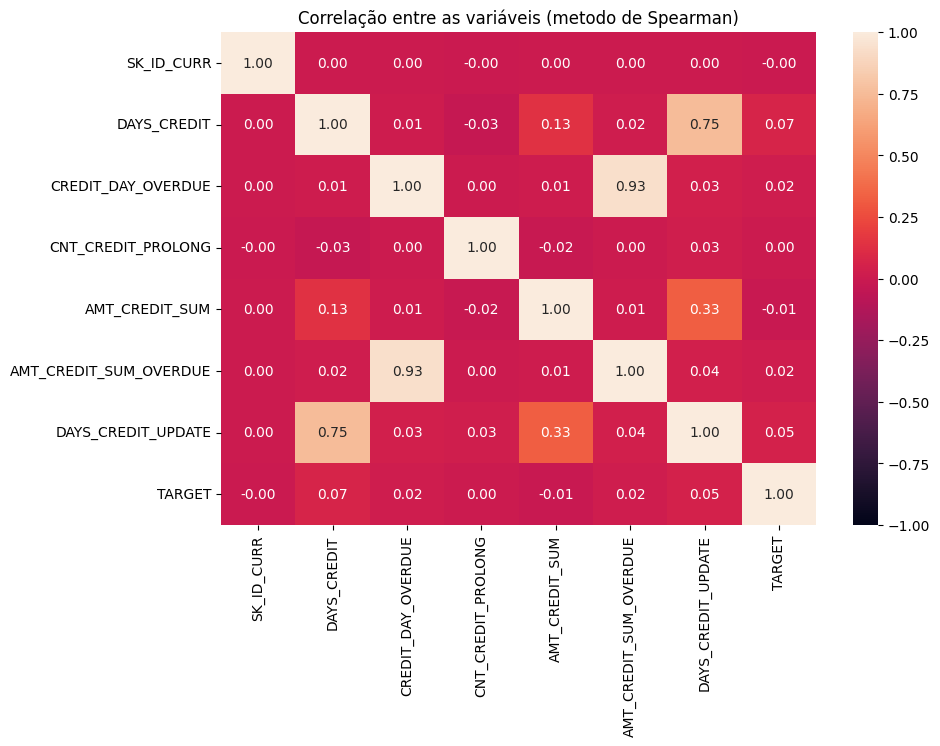

In [16]:
correlacoes = df_merge.corr(numeric_only=True,method='spearman') # Calcula a correlação
# Ajuste automático do tamanho
num_cols = correlacoes.shape[1]
fig_width = num_cols * 1.2  # Ajuste de largura
fig_height = num_cols * 0.8  # Ajuste de altura

plt.figure(figsize=(fig_width, fig_height))
plt.title('Correlação entre as variáveis (metodo de Spearman)')
sns.heatmap(correlacoes, annot=True, fmt=".2f", vmin=-1, vmax=1);

In [17]:
filtra_colunas(correlacoes)

,DAYS_CREDIT,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE
DAYS_CREDIT,NaN,NaN,0.753068
AMT_CREDIT_SUM,NaN,NaN,0.326335
DAYS_CREDIT_UPDATE,0.753068,0.326335,NaN


### DF credit_card_balance.csv

In [18]:
df = pd.read_csv('.\\data\\credit_card_balance.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [20]:
df.shape

(3840312, 23)

In [21]:
df_merge = df.merge(df2[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner') # how='left'
df_merge.shape

(3227965, 24)

In [22]:
aux = valores_nulos_por_cols(df_merge).sort_values(by='porcentagem_nulos', ascending=False)
aux.head(10)


Total de colunas com valores nulos: 9


,nome_col,quantidade_nulos,porcentagem_nulos
4,AMT_PAYMENT_CURRENT,620093,19.210
0,AMT_DRAWINGS_ATM_CURRENT,605754,18.766
1,AMT_DRAWINGS_OTHER_CURRENT,605754,18.766
2,AMT_DRAWINGS_POS_CURRENT,605754,18.766
5,CNT_DRAWINGS_ATM_CURRENT,605754,18.766
7,CNT_DRAWINGS_POS_CURRENT,605754,18.766
6,CNT_DRAWINGS_OTHER_CURRENT,605754,18.766
3,AMT_INST_MIN_REGULARITY,264384,8.190
8,CNT_INSTALMENT_MATURE_CUM,264384,8.190


In [23]:
remover = list(aux['nome_col'].loc[aux['porcentagem_nulos'] >1])
remover.append('SK_ID_PREV')
df_merge.drop(columns=remover, inplace=True)
df_merge.shape

(3227965, 14)

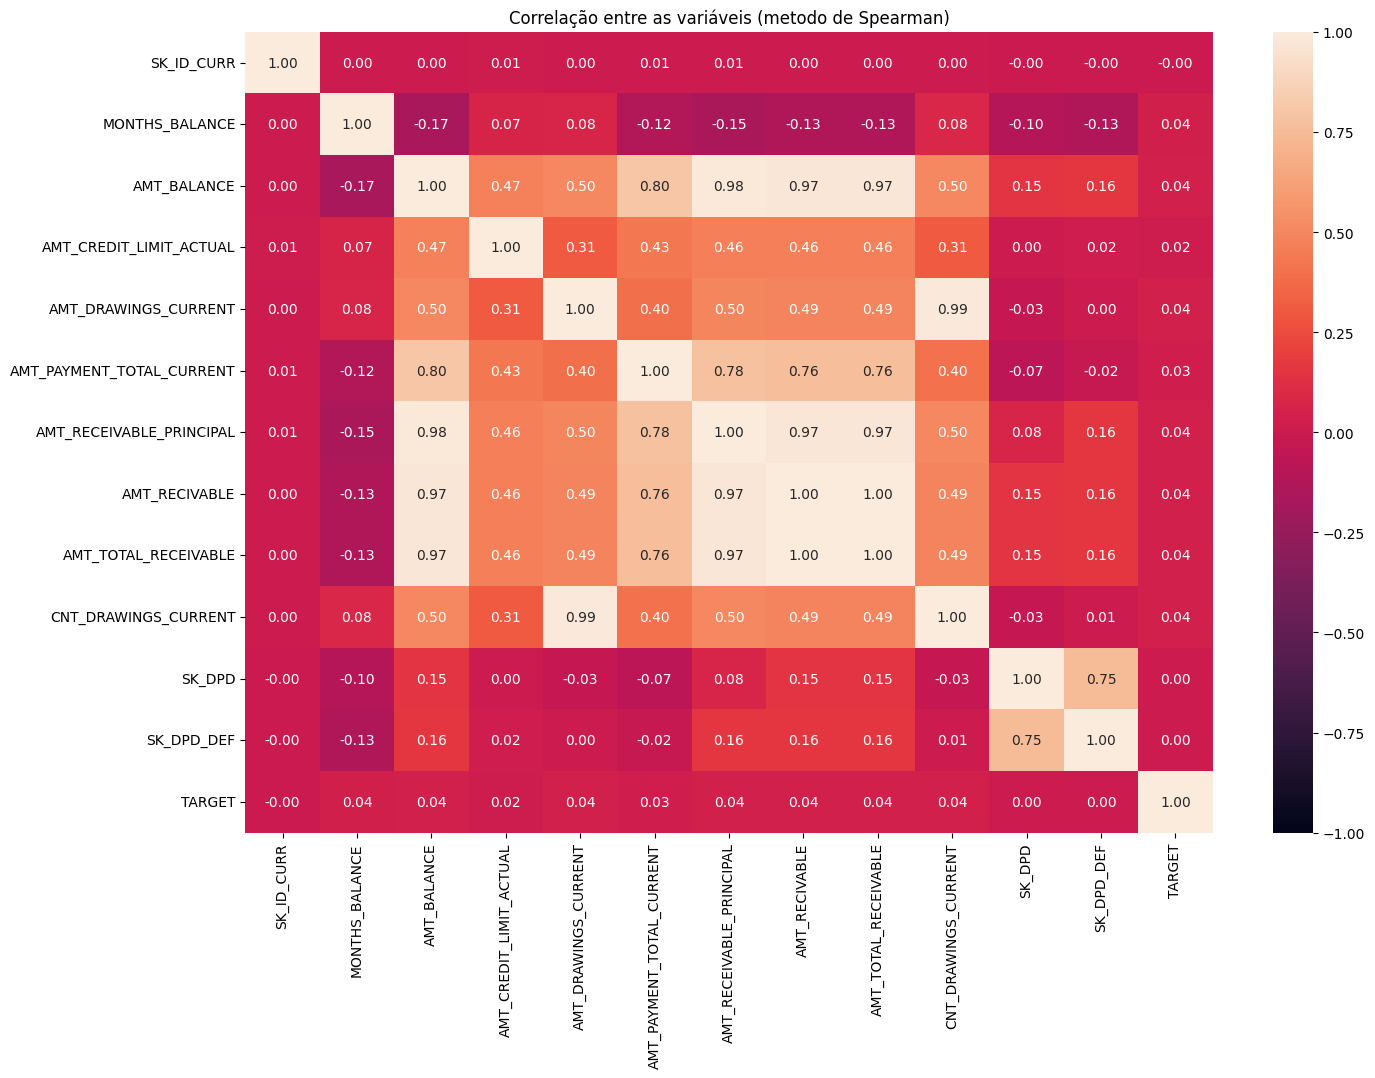

In [24]:
correlacoes = df_merge.corr(numeric_only=True,method='spearman') # Calcula a correlação
# Ajuste automático do tamanho
num_cols = correlacoes.shape[1]
fig_width = num_cols * 1.2  # Ajuste de largura
fig_height = num_cols * 0.8  # Ajuste de altura

plt.figure(figsize=(fig_width, fig_height))
plt.title('Correlação entre as variáveis (metodo de Spearman)')
sns.heatmap(correlacoes, annot=True, fmt=".2f", vmin=-1, vmax=1);

In [25]:
# colunas = df_merge.columns
# dell = ['AMT_BALANCE','AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'AMT_DRAWINGS_CURRENT']
# for i in dell:
#     colunas = colunas.drop(i)

# colunas
filtra_colunas(correlacoes)

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_CURRENT,SK_DPD,SK_DPD_DEF
AMT_BALANCE,NaN,0.470317,0.500589,0.798512,NaN,NaN,NaN,0.504488,NaN,NaN
AMT_CREDIT_LIMIT_ACTUAL,0.470317,NaN,0.309528,0.433792,0.463888,0.461997,0.461990,0.309297,NaN,NaN
AMT_DRAWINGS_CURRENT,0.500589,0.309528,NaN,0.397714,0.498700,0.487470,0.487424,NaN,NaN,NaN
AMT_PAYMENT_TOTAL_CURRENT,0.798512,0.433792,0.397714,NaN,0.776410,0.763529,0.763574,0.403942,NaN,NaN
AMT_RECEIVABLE_PRINCIPAL,NaN,0.463888,0.498700,0.776410,NaN,NaN,NaN,0.502651,NaN,NaN
AMT_RECIVABLE,NaN,0.461997,0.487470,0.763529,NaN,NaN,NaN,0.491147,NaN,NaN
AMT_TOTAL_RECEIVABLE,NaN,0.461990,0.487424,0.763574,NaN,NaN,NaN,0.491101,NaN,NaN
CNT_DRAWINGS_CURRENT,0.504488,0.309297,NaN,0.403942,0.502651,0.491147,0.491101,NaN,NaN,NaN
SK_DPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745639
SK_DPD_DEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745639,NaN


### DF installments_payments.csv

In [26]:
df = pd.read_csv('.\\data\\installments_payments.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [28]:
df.shape

(13605401, 8)

In [29]:
df_merge = df.merge(df2[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner') # how='left'
df_merge.shape

(11591592, 9)

In [30]:
aux = valores_nulos_por_cols(df_merge).sort_values(by='porcentagem_nulos', ascending=False)
aux.head(10)


Total de colunas com valores nulos: 2


,nome_col,quantidade_nulos,porcentagem_nulos
0,DAYS_ENTRY_PAYMENT,2583,0.022
1,AMT_PAYMENT,2583,0.022


In [31]:
remover = list(aux['nome_col'].loc[aux['porcentagem_nulos'] >1])
remover.append('SK_ID_PREV')
df_merge.drop(columns=remover, inplace=True)
df_merge.shape

(11591592, 8)

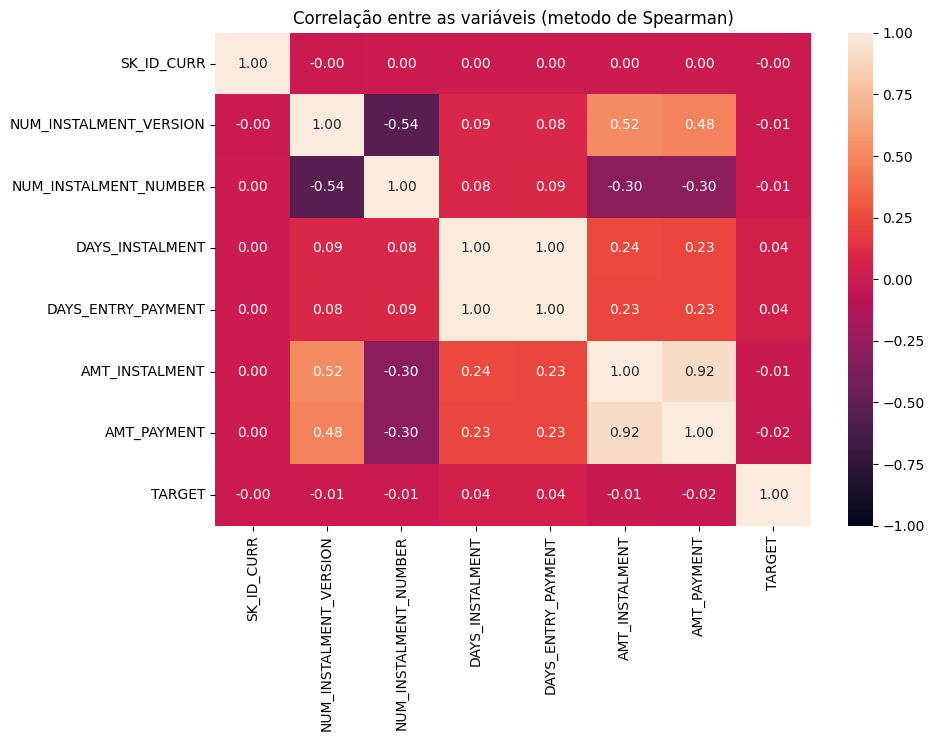

In [32]:
correlacoes = df_merge.corr(numeric_only=True,method='spearman') # Calcula a correlação
# Ajuste automático do tamanho
num_cols = correlacoes.shape[1]
fig_width = num_cols * 1.2  # Ajuste de largura
fig_height = num_cols * 0.8  # Ajuste de altura

plt.figure(figsize=(fig_width, fig_height))
plt.title('Correlação entre as variáveis (metodo de Spearman)')
sns.heatmap(correlacoes, annot=True, fmt=".2f", vmin=-1, vmax=1);

In [33]:
# colunas = df_merge.columns
# colunas
# colunas = colunas.drop('DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT')
# colunas
filtra_colunas(correlacoes)

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,AMT_INSTALMENT,AMT_PAYMENT
NUM_INSTALMENT_VERSION,NaN,-0.541274,0.517646,0.480584
NUM_INSTALMENT_NUMBER,-0.541274,NaN,NaN,NaN
AMT_INSTALMENT,0.517646,NaN,NaN,NaN
AMT_PAYMENT,0.480584,NaN,NaN,NaN


### DF POS_CASH_balance.csv

In [34]:
df = pd.read_csv('.\\data\\pos_cash_balance.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [36]:
df.shape

(10001358, 8)

In [37]:
df_merge = df.merge(df2[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner') # how='left'
df_merge.shape

(8543375, 9)

In [38]:
aux = valores_nulos_por_cols(df_merge).sort_values(by='porcentagem_nulos', ascending=False)
aux.head(10)


Total de colunas com valores nulos: 2


,nome_col,quantidade_nulos,porcentagem_nulos
0,CNT_INSTALMENT,21863,0.256
1,CNT_INSTALMENT_FUTURE,21878,0.256


In [39]:
remover = list(aux['nome_col'].loc[aux['porcentagem_nulos'] >1])
remover.append('SK_ID_PREV')
df_merge.drop(columns=remover, inplace=True)
df_merge.shape

(8543375, 8)

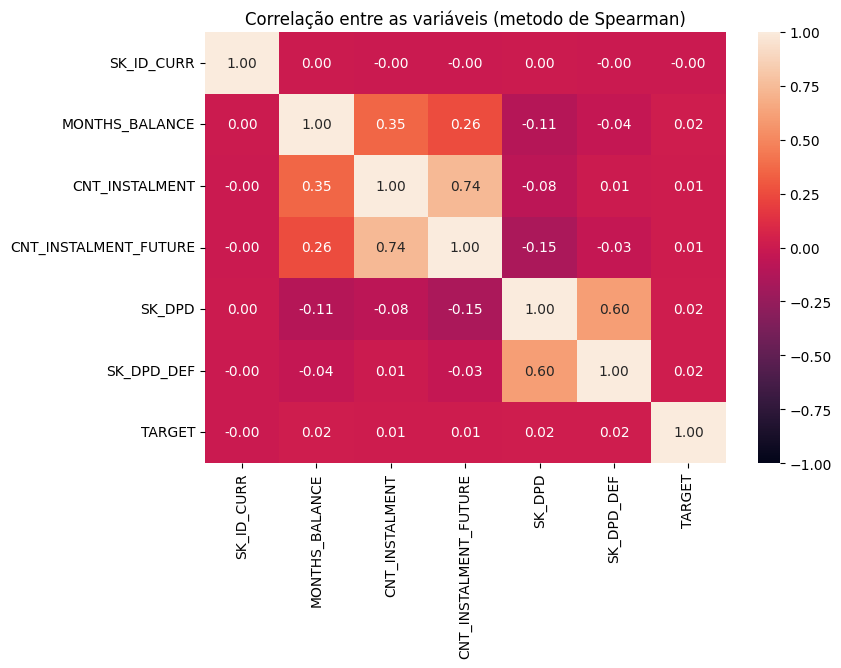

In [40]:
correlacoes = df_merge.corr(numeric_only=True,method='spearman') # Calcula a correlação
# Ajuste automático do tamanho
num_cols = correlacoes.shape[1]
fig_width = num_cols * 1.2  # Ajuste de largura
fig_height = num_cols * 0.8  # Ajuste de altura

plt.figure(figsize=(fig_width, fig_height))
plt.title('Correlação entre as variáveis (metodo de Spearman)')
sns.heatmap(correlacoes, annot=True, fmt=".2f", vmin=-1, vmax=1);

In [41]:
# colunas = df_merge.columns
# colunas
filtra_colunas(correlacoes)

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
MONTHS_BALANCE,NaN,0.353963,NaN,NaN,NaN
CNT_INSTALMENT,0.353963,NaN,0.740941,NaN,NaN
CNT_INSTALMENT_FUTURE,NaN,0.740941,NaN,NaN,NaN
SK_DPD,NaN,NaN,NaN,NaN,0.603069
SK_DPD_DEF,NaN,NaN,NaN,0.603069,NaN


### DF previous_application.csv

In [42]:
df = pd.read_csv('.\\data\\previous_application.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [44]:
df.shape

(1670214, 37)

In [45]:
df_merge = df.merge(df2[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner') # how='left'
df_merge.shape

(1413701, 38)

In [46]:
aux = valores_nulos_por_cols(df_merge).sort_values(by='porcentagem_nulos', ascending=False)
aux.head(16)


Total de colunas com valores nulos: 16


,nome_col,quantidade_nulos,porcentagem_nulos
6,RATE_INTEREST_PRIVILEGED,1408910,99.661
5,RATE_INTEREST_PRIMARY,1408910,99.661
2,AMT_DOWN_PAYMENT,749540,53.020
4,RATE_DOWN_PAYMENT,749540,53.020
7,NAME_TYPE_SUITE,694672,49.139
13,DAYS_LAST_DUE,561106,39.691
10,DAYS_FIRST_DRAWING,561106,39.691
11,DAYS_FIRST_DUE,561106,39.691
14,DAYS_TERMINATION,561106,39.691
15,NFLAG_INSURED_ON_APPROVAL,561106,39.691


In [47]:
remover = list(aux['nome_col'].loc[aux['porcentagem_nulos'] >1])
remover.append('SK_ID_PREV')
df_merge.drop(columns=remover, inplace=True)
df_merge.shape

(1413701, 23)

In [48]:
df_merge.shape

(1413701, 23)

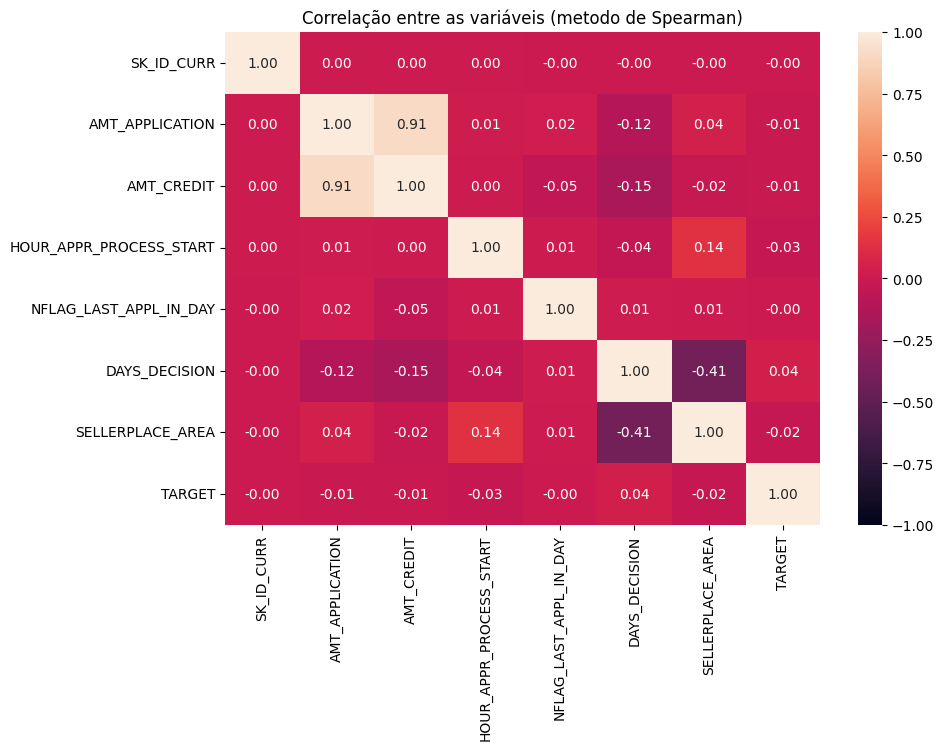

In [49]:
correlacoes = df_merge.corr(numeric_only=True,method='spearman') # Calcula a correlação
# Ajuste automático do tamanho
num_cols = correlacoes.shape[1]
fig_width = num_cols * 1.2  # Ajuste de largura
fig_height = num_cols * 0.8  # Ajuste de altura

plt.figure(figsize=(fig_width, fig_height))
plt.title('Correlação entre as variáveis (metodo de Spearman)')
sns.heatmap(correlacoes, annot=True, fmt=".2f", vmin=-1, vmax=1);

In [50]:
# colunas = df_merge.columns
# colunas = colunas.drop('AMT_APPLICATION')
# colunas
filtra_colunas(correlacoes)

,DAYS_DECISION,SELLERPLACE_AREA
DAYS_DECISION,NaN,-0.409974
SELLERPLACE_AREA,-0.409974,NaN


## Merge

### Bureau.csv

In [51]:
df = pd.read_csv('.\\data\\bureau.csv')
reduce_mem_usage(df)

Memory usage after optimization is: 112.95 MB
Decreased by 49.3%


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,9.132300e+04,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,2.250000e+05,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,4.643235e+05,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,9.000000e+04,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2.700000e+06,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,1.125000e+04,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2432.0,-2492.0,5476.5,0,3.813084e+04,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,1.557000e+04,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,3.600000e+04,0.0,0.0,0.0,Consumer credit,-1508,NaN


#### Analises variaveis categoricas

In [52]:
colunas_numericas = df.select_dtypes(include=['number']).columns # Identificando variáveis numéricas
colunas_categoricas = df.select_dtypes(exclude=['number']).columns # Identificando variáveis categóricas (excluindo numéricas)

- O atributo CREDIT_ACTIVE apresenta 4 classe, poerem não faz muito sentido ser utlizado por que as amostras finais serão agregadas então a classe perderia o estado real, de representar um status de uma amostra.

- O atributo CREDIT_CURRENCY é majoritariamente dominado pela classe currency 1, portanto não será usado pelo fator de desbalancemento de amostras.

- Coluna: CREDIT_TYPE não será utilizada pois necessitaria de realizar transformações que perderiam a informação principal da coluna, mesmo caso do primeiro atributo.


In [53]:
for col in colunas_categoricas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: CREDIT_ACTIVE
Closed      62.879014
Active      36.739496
Sold         0.380266
Bad debt     0.001223
Name: count, dtype: float64 

Coluna: CREDIT_CURRENCY
currency 1    99.917969
currency 2     0.071311
currency 3     0.010137
currency 4     0.000583
Name: count, dtype: float64 

Coluna: CREDIT_TYPE
Consumer credit                                 72.919750
Credit card                                     23.432093
Car loan                                         1.613234
Mortgage                                         1.071469
Microloan                                        0.723188
Loan for business development                    0.115065
Another type of loan                             0.059251
Unknown type of loan                             0.032335
Loan for working capital replenishment           0.027324
Cash loan (non-earmarked)                        0.003263
Real estate loan                                 0.001573
Loan for the purchase of equipment               0.0

#### tratando valores nulos.

In [54]:
df = df[colunas_numericas]

- Colunas com mais de 10% de valores nulos serão removidas.

In [55]:
lista = valores_nulos_por_cols(df).sort_values(by='porcentagem_nulos', ascending=False)
lista


Total de colunas com valores nulos: 7


,nome_col,quantidade_nulos,porcentagem_nulos
6,AMT_ANNUITY,1226791,71.473
2,AMT_CREDIT_MAX_OVERDUE,1124488,65.513
1,DAYS_ENDDATE_FACT,633653,36.917
5,AMT_CREDIT_SUM_LIMIT,591780,34.477
4,AMT_CREDIT_SUM_DEBT,257669,15.012
0,DAYS_CREDIT_ENDDATE,105553,6.150
3,AMT_CREDIT_SUM,13,0.001


In [56]:
lista = list(lista['nome_col'].loc[lista['porcentagem_nulos'] > 10])
lista.append('SK_ID_BUREAU')
df.drop(columns=lista, inplace=True)

In [57]:
# df = df [colunas_numericas]# [['SK_ID_CURR','DAYS_CREDIT', 'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE', 'Consumer credit']]
df.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE
0,215354,-497,0,-153.0,0,91323.0,0.0,-131
1,215354,-208,0,1075.0,0,225000.0,0.0,-20
2,215354,-203,0,528.0,0,464323.5,0.0,-16
3,215354,-203,0,NaN,0,90000.0,0.0,-16
4,215354,-629,0,1197.0,0,2700000.0,0.0,-21


##### Analise Variaveis numericas

In [58]:
colunas_numericas = df.select_dtypes(include=['number']).columns.drop('SK_ID_CURR') # Identificando variáveis numéricas fora a coluna SK_ID_CURR
colunas_numericas

Index(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE',
       'DAYS_CREDIT_UPDATE'],
      dtype='object')

In [59]:
# Criando scatter plots para as colunas numéricas
# sns.pairplot(df[colunas_numericas])
# plt.show()

In [60]:
import math
for col in colunas_numericas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: DAYS_CREDIT
-364    0.077487
-336    0.072709
-273    0.072127
-357    0.070961
-343    0.070087
          ...   
-4      0.006583
-3      0.004311
-2      0.002447
 0      0.001457
-1      0.000990
Name: count, Length: 2923, dtype: float64 

Coluna: CREDIT_DAY_OVERDUE
0       99.754315
30       0.018119
60       0.007341
13       0.006001
8        0.006001
          ...    
324      0.000058
765      0.000058
2256     0.000058
1278     0.000058
2284     0.000058
Name: count, Length: 942, dtype: float64 

Coluna: DAYS_CREDIT_ENDDATE
31072.0    0.141224
31056.0    0.125318
31088.0    0.114948
30912.0    0.105568
31184.0    0.101373
             ...   
27744.0    0.000058
8052.0     0.000058
3982.0     0.000058
11336.0    0.000058
13616.0    0.000058
Name: count, Length: 7054, dtype: float64 

Coluna: CNT_CREDIT_PROLONG
0    99.469014
1     0.443945
2     0.071194
3     0.011128
4     0.003146
5     0.001223
9     0.000117
6     0.000117
8     0.000058
7     0.000058
Name: count,

In [61]:
colunas_numericas

Index(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE',
       'DAYS_CREDIT_UPDATE'],
      dtype='object')

- A Média é ensível a outliers. Se houver grandes discrepâncias nos dados (ex.: um cliente com um crédito muito alto ou um grande número de dias de atraso), a média pode ser distorcida. Por tanto, será utilizada a Mediana, porque ela pode ser mais resistente a outliers, pois pega o valor central dos dados ordenados. Se os dados estiverem muito desbalanceados, a mediana pode fornecer uma visão mais representativa.

In [62]:
df = df.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': 'median',
    'CREDIT_DAY_OVERDUE': 'median',
    'DAYS_CREDIT_ENDDATE': 'median',
    'CNT_CREDIT_PROLONG': 'median',
    'AMT_CREDIT_SUM': 'median',
    'AMT_CREDIT_SUM_OVERDUE': 'median',
    'DAYS_CREDIT_UPDATE': 'median'
}).reset_index()



In [63]:
df.head(10)

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE
0,100001,-857.0,0.0,-179.0,0.0,168345.000000,0.0,-155.0
1,100002,-1042.5,0.0,-424.5,0.0,54130.500000,0.0,-402.5
2,100003,-1205.5,0.0,-480.0,0.0,92576.250000,0.0,-545.0
3,100004,-867.0,0.0,-488.5,0.0,94518.898438,0.0,-532.0
4,100005,-137.0,0.0,122.0,0.0,58500.000000,0.0,-31.0
5,100007,-1149.0,0.0,-783.0,0.0,146250.000000,0.0,-783.0
6,100008,-1097.0,0.0,-792.0,0.0,105705.000000,0.0,-790.0
7,100009,-1276.0,0.0,-1068.0,0.0,105660.000000,0.0,-898.0
8,100010,-1939.5,0.0,-119.5,0.0,495000.000000,0.0,-578.0
9,100011,-1637.5,0.0,-1070.0,0.0,117993.148438,0.0,-1341.0


- Merge entre o df principal e eo df_bureau

In [64]:
df2 = pd.read_csv('.\\data\\application_test.csv')
reduce_mem_usage(df2)

Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [65]:
df_merge = df2.merge(df, on='SK_ID_CURR', how='left')
reduce_mem_usage(df_merge)

Memory usage after optimization is: 15.34 MB
Decreased by 10.8%


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,-857.0,0.0,-179.0,0.0,168345.000000,0.0,-155.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,3.0,-137.0,0.0,122.0,0.0,58500.000000,0.0,-31.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,1.0,4.0,-1835.0,0.0,-999.0,0.0,391770.000000,0.0,-882.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,3.0,-1612.0,0.0,-896.5,0.0,129614.039062,0.0,-683.5
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0.0,0.0,1.0,-601.0,0.0,-98.0,0.0,145867.500000,0.0,-99.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0.0,3.0,1.0,-349.0,0.0,-407.5,0.0,54000.000000,0.0,-159.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0.0,0.0,2.0,-1421.0,0.0,-1122.0,0.0,147339.000000,0.0,-1058.0


### credit_card_balance.csv'

In [66]:
df = pd.read_csv('.\\data\\credit_card_balance.csv')
reduce_mem_usage(df)

Memory usage after optimization is: 289.33 MB
Decreased by 57.1%


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000000,45000,NaN,0.0,NaN,NaN,0.000000,...,0.000000,0.000000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000000,45000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.968750,585000,270000.0,270000.0,0.0,0.0,2250.000000,...,273093.968750,273093.968750,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000000,450000,NaN,0.0,NaN,NaN,0.000000,...,0.000000,0.000000,NaN,0,NaN,NaN,0.0,Active,0,0


In [67]:
colunas_numericas = df.select_dtypes(include=['number']).columns # Identificando variáveis numéricas
colunas_categoricas = df.select_dtypes(exclude=['number']).columns # Identificando variáveis categóricas (excluindo numéricas)

In [68]:
lista = valores_nulos_por_cols(df).sort_values(by='porcentagem_nulos', ascending=False)
lista


Total de colunas com valores nulos: 9


,nome_col,quantidade_nulos,porcentagem_nulos
4,AMT_PAYMENT_CURRENT,767988,19.998
0,AMT_DRAWINGS_ATM_CURRENT,749816,19.525
1,AMT_DRAWINGS_OTHER_CURRENT,749816,19.525
2,AMT_DRAWINGS_POS_CURRENT,749816,19.525
5,CNT_DRAWINGS_ATM_CURRENT,749816,19.525
7,CNT_DRAWINGS_POS_CURRENT,749816,19.525
6,CNT_DRAWINGS_OTHER_CURRENT,749816,19.525
3,AMT_INST_MIN_REGULARITY,305236,7.948
8,CNT_INSTALMENT_MATURE_CUM,305236,7.948


In [69]:
lista = list(lista['nome_col'].loc[lista['porcentagem_nulos'] > 10])
lista.append('SK_ID_PREV')
df.drop(columns=lista, inplace=True)

- Analise variaveis vategoricas

A coluna esta desbalanceada, com  96 por cento para classe ACTIVE, portanto não será utilizada está coluna.

In [70]:
for col in colunas_categoricas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: NAME_CONTRACT_STATUS
Active           96.305613
Completed         3.356967
Signed            0.287945
Demand            0.035544
Sent proposal     0.013358
Refused           0.000443
Approved          0.000130
Name: count, dtype: float64 



- Analise variaveis numericas

In [71]:
colunas_numericas = df.select_dtypes(include=['number']).columns# Identificando variáveis numéricas fora a coluna SK_ID_CURR

In [72]:
for col in colunas_numericas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: SK_ID_CURR
186401    0.005000
311118    0.004635
120076    0.003646
128827    0.003359
246089    0.003333
            ...   
304318    0.000026
359275    0.000026
405801    0.000026
135005    0.000026
438104    0.000026
Name: count, Length: 103558, dtype: float64 

Coluna: MONTHS_BALANCE
-4     2.659029
-5     2.618173
-3     2.613199
-6     2.566901
-7     2.482402
         ...   
-92    0.388276
-93    0.369684
-94    0.348852
-95    0.326041
-96    0.305236
Name: count, Length: 96, dtype: float64 

Coluna: AMT_BALANCE
0.000000         56.152208
67.500000         0.417909
130.500000        0.095357
270.000000        0.060229
135.000000        0.023982
                   ...    
72899.953125      0.000026
131294.343750     0.000026
1427.265015       0.000026
102076.562500     0.000026
201261.187500     0.000026
Name: count, Length: 1347882, dtype: float64 

Coluna: AMT_CREDIT_LIMIT_ACTUAL
0         19.629212
180000    13.782526
135000    11.200705
45000      8.591281
90000    

In [73]:
colunas_numericas

Index(['SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

- Analise das variaveis com uma melhor correlação absoluta com a coluna Target

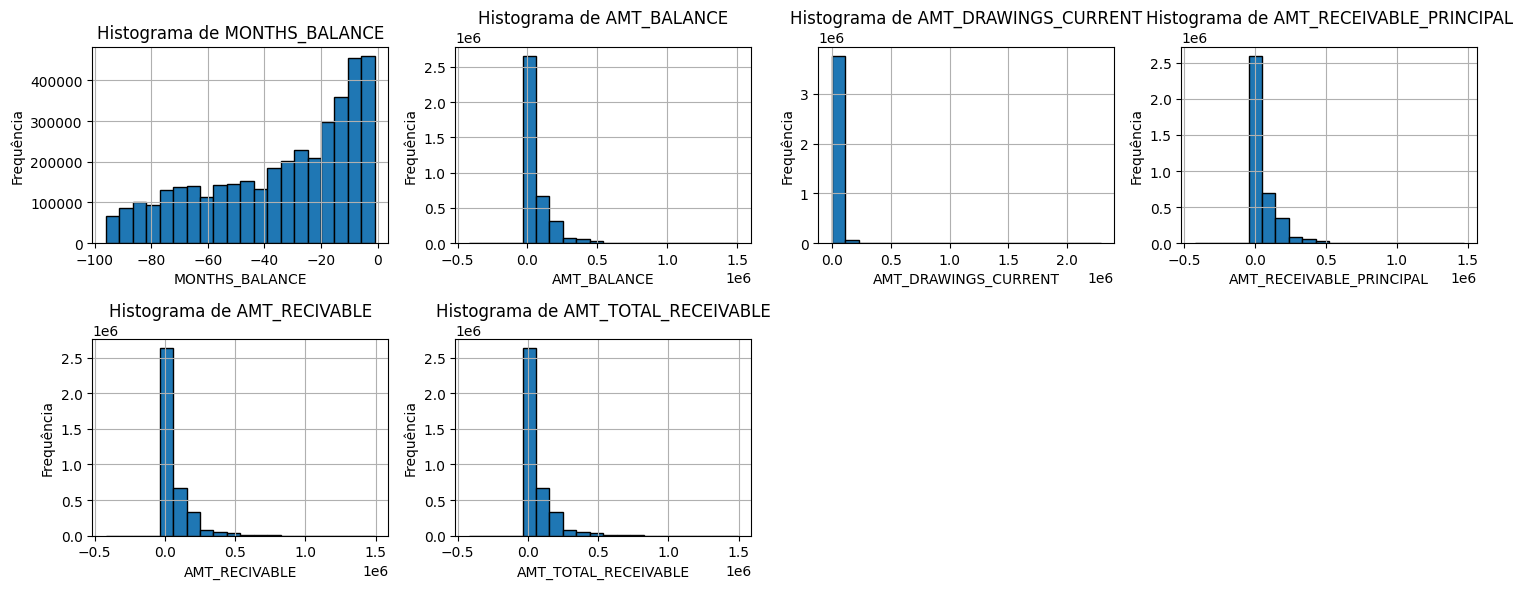

In [74]:
import math

cols = ['MONTHS_BALANCE','AMT_BALANCE','AMT_DRAWINGS_CURRENT','AMT_RECEIVABLE_PRINCIPAL', 
'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE']

num_cols = len(cols)
num_rows = math.ceil(num_cols / 4)  # Ajuste para 4 colunas por linha
plt.figure(figsize=(15, num_rows * 3))

# Criando os histogramas
for i, column in enumerate(cols, 1):
    plt.subplot(num_rows, 4, i)
    df[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- Agrupando os dados pelo SK_ID_CRR. As colunas foram escolhidas conforme a matriz de confusão.
    - MONTHS_BALANCE (0.04)
    - AMT_BALANCE (0.04)
    - AMT_DRAWINGS_CURRENT (0.04)
    - AMT_RECEIVABLE_PRINCIPAL (0.04)
    - AMT_RECIVABLE (0.04)
    - AMT_TOTAL_RECEIVABLE (0.04)


In [75]:
df2 = df.groupby('SK_ID_CURR').agg({
       'MONTHS_BALANCE':'mean', 
       'AMT_BALANCE':'median',
       'AMT_DRAWINGS_CURRENT':'median',
       'AMT_RECEIVABLE_PRINCIPAL':'median', 
       'AMT_RECIVABLE':'median',
       'AMT_TOTAL_RECEIVABLE':'median'
}).reset_index()

In [76]:
df_merge = df_merge.merge(df2, on='SK_ID_CURR', how='left')
reduce_mem_usage(df_merge)

Memory usage after optimization is: 16.36 MB
Decreased by 6.9%


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,168345.000000,0.0,-155.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,58500.000000,0.0,-31.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,391770.000000,0.0,-882.0,-48.5,0.000000,0.000000,0.00000,0.000000,0.000000
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,129614.039062,0.0,-683.5,-25.0,7431.299805,5021.009766,6750.00000,7311.330078,7311.330078
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0.0,145867.500000,0.0,-99.0,NaN,NaN,NaN,NaN,NaN,NaN
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0.0,54000.000000,0.0,-159.0,NaN,NaN,NaN,NaN,NaN,NaN
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0.0,147339.000000,0.0,-1058.0,NaN,NaN,NaN,NaN,NaN,NaN


### installments_payments.csv

In [77]:
df = pd.read_csv('.\\data\\installments_payments.csv')
reduce_mem_usage(df)

Memory usage after optimization is: 311.40 MB
Decreased by 62.5%


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500000,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500000,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.433594,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500000,NaN


In [78]:
colunas_numericas = df.select_dtypes(include=['number']).columns # Identificando variáveis numéricas
colunas_categoricas = df.select_dtypes(exclude=['number']).columns # Identificando variáveis categóricas (excluindo numéricas)

In [79]:
lista = valores_nulos_por_cols(df).sort_values(by='porcentagem_nulos', ascending=False)
lista


Total de colunas com valores nulos: 2


,nome_col,quantidade_nulos,porcentagem_nulos
0,DAYS_ENTRY_PAYMENT,2905,0.021
1,AMT_PAYMENT,2905,0.021


In [80]:
lista = list(lista['nome_col'].loc[lista['porcentagem_nulos'] > 10])
lista.append('SK_ID_PREV')
df.drop(columns=lista, inplace=True)

- Analise variaveis vategoricas

A coluna esta desbalanceada, com  96 por cento para classe ACTIVE, portanto não será utilizada está coluna.

In [81]:
for col in colunas_categoricas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

- Analise variaveis numericas

In [82]:
colunas_numericas = df.select_dtypes(include=['number']).columns# Identificando variáveis numéricas fora a coluna SK_ID_CURR

In [83]:
for col in colunas_numericas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: SK_ID_CURR
145728    0.002734
296205    0.002573
453103    0.002550
189699    0.002528
186851    0.002477
            ...   
215358    0.000007
293010    0.000007
412442    0.000007
436772    0.000007
441700    0.000007
Name: count, Length: 339587, dtype: float64 

Coluna: NUM_INSTALMENT_VERSION
1.0     62.364968
0.0     30.006451
2.0      4.559094
3.0      1.742418
4.0      0.406265
          ...    
54.0     0.000007
55.0     0.000007
56.0     0.000007
59.0     0.000007
73.0     0.000007
Name: count, Length: 65, dtype: float64 

Coluna: NUM_INSTALMENT_NUMBER
1      7.380598
2      7.245035
3      7.116872
4      6.934761
5      6.468071
         ...   
266    0.000015
270    0.000015
277    0.000007
274    0.000007
276    0.000007
Name: count, Length: 277, dtype: float64 

Coluna: DAYS_INSTALMENT
-120.0     0.084613
-180.0     0.082408
-150.0     0.082276
-119.0     0.082195
-149.0     0.081909
             ...   
-2886.0    0.010297
-2902.0    0.010239
-2922.0    0.009753
-2

In [84]:
colunas_numericas

Index(['SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER',
       'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT'],
      dtype='object')

- Analise das variaveis com uma melhor correlação absoluta com a coluna Target

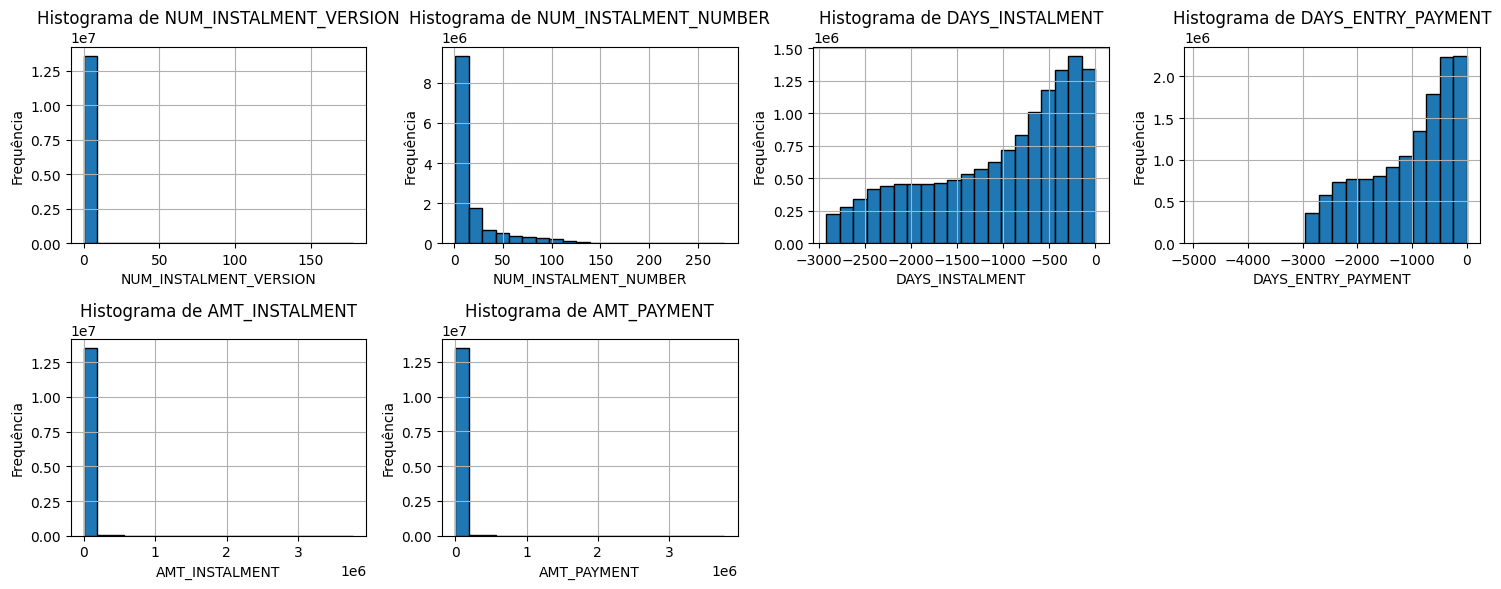

In [85]:
import math

cols = ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER',
       'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT']

num_cols = len(cols)
num_rows = math.ceil(num_cols / 4)  # Ajuste para 4 colunas por linha
plt.figure(figsize=(15, num_rows * 3))

# Criando os histogramas
for i, column in enumerate(cols, 1):
    plt.subplot(num_rows, 4, i)
    df[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- Agrupando os dados pelo SK_ID_CRR. As colunas foram escolhidas conforme a matriz de confusão.
    - DAYS_INSTALMENT (0.04)
    - DAYS_ENTRY_PAYMENT (0.04)



In [86]:
df2 = df.groupby('SK_ID_CURR').agg({
       'DAYS_INSTALMENT':'median', 
       'DAYS_ENTRY_PAYMENT':'median'
}).reset_index()

In [87]:
df2.head(10)

,SK_ID_CURR,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,100001,-1709.0,-1715.0
1,100002,-295.0,-312.0
2,100003,-797.0,-806.0
3,100004,-754.0,-763.0
4,100005,-586.0,-585.0
5,100006,-206.0,-211.0
6,100007,-851.0,-852.5
7,100008,-609.0,-618.0
8,100009,-645.0,-666.0
9,100010,-904.0,-913.5


In [88]:
df_merge = df_merge.merge(df2, on='SK_ID_CURR', how='left')
reduce_mem_usage(df_merge)

Memory usage after optimization is: 16.55 MB
Decreased by 3.3%


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,-1709.0,-1715.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,-31.0,NaN,NaN,NaN,NaN,NaN,NaN,-586.0,-585.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,-882.0,-48.5,0.000000,0.000000,0.00000,0.000000,0.000000,-1383.0,-1383.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,-683.5,-25.0,7431.299805,5021.009766,6750.00000,7311.330078,7311.330078,-812.0,-812.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-622.0,-634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0.0,-99.0,NaN,NaN,NaN,NaN,NaN,NaN,-623.0,-631.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-592.0,-600.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0.0,-159.0,NaN,NaN,NaN,NaN,NaN,NaN,-701.0,-762.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0.0,-1058.0,NaN,NaN,NaN,NaN,NaN,NaN,-426.0,-438.0


### pos_cash_balance.csv

In [89]:
df = pd.read_csv('.\\data\\pos_cash_balance.csv')
reduce_mem_usage(df)

Memory usage after optimization is: 238.45 MB
Decreased by 60.9%


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [90]:
colunas_numericas = df.select_dtypes(include=['number']).columns # Identificando variáveis numéricas
colunas_categoricas = df.select_dtypes(exclude=['number']).columns # Identificando variáveis categóricas (excluindo numéricas)

In [91]:
lista = valores_nulos_por_cols(df).sort_values(by='porcentagem_nulos', ascending=False)
lista


Total de colunas com valores nulos: 2


,nome_col,quantidade_nulos,porcentagem_nulos
0,CNT_INSTALMENT,26071,0.261
1,CNT_INSTALMENT_FUTURE,26087,0.261


In [92]:
lista = list(lista['nome_col'].loc[lista['porcentagem_nulos'] > 10])
lista.append('SK_ID_PREV')
df.drop(columns=lista, inplace=True)

- Analise variaveis vategoricas

A coluna NAME_CONTRACT_STATUS esta desbalanceada, com  91 por cento para classe ACTIVE, portanto não será utilizada está coluna.

In [93]:
for col in colunas_categoricas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: NAME_CONTRACT_STATUS
Active                   91.498764
Completed                 7.447819
Signed                    0.872482
Demand                    0.070640
Returned to the store     0.054603
Approved                  0.049163
Amortized debt            0.006359
Canceled                  0.000150
XNA                       0.000020
Name: count, dtype: float64 



- Analise variaveis numericas

In [94]:
colunas_numericas = df.select_dtypes(include=['number']).columns# Identificando variáveis numéricas fora a coluna SK_ID_CURR

In [95]:
for col in colunas_numericas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: SK_ID_CURR
265042    0.00295
172612    0.00247
309133    0.00246
197583    0.00245
127659    0.00245
           ...   
203120    0.00001
274925    0.00001
281029    0.00001
224555    0.00001
169377    0.00001
Name: count, Length: 337252, dtype: float64 

Coluna: MONTHS_BALANCE
-10    2.164116
-11    2.159937
-9     2.155287
-12    2.146868
-8     2.141199
         ...   
-92    0.422773
-93    0.410194
-94    0.398946
-95    0.385088
-96    0.364431
Name: count, Length: 96, dtype: float64 

Coluna: CNT_INSTALMENT
12.0    24.965060
24.0    15.172660
10.0    12.432802
6.0     10.653553
18.0     7.272952
          ...    
70.0     0.000020
63.0     0.000020
92.0     0.000010
81.0     0.000010
68.0     0.000010
Name: count, Length: 73, dtype: float64 

Coluna: CNT_INSTALMENT_FUTURE
0.0     11.857990
6.0      6.139746
4.0      6.135487
5.0      6.002135
3.0      5.819280
          ...    
80.0     0.000010
82.0     0.000010
83.0     0.000010
81.0     0.000010
84.0     0.000010
Name:

In [96]:
colunas_numericas

Index(['SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

- Analise das variaveis com uma melhor correlação absoluta com a coluna Target

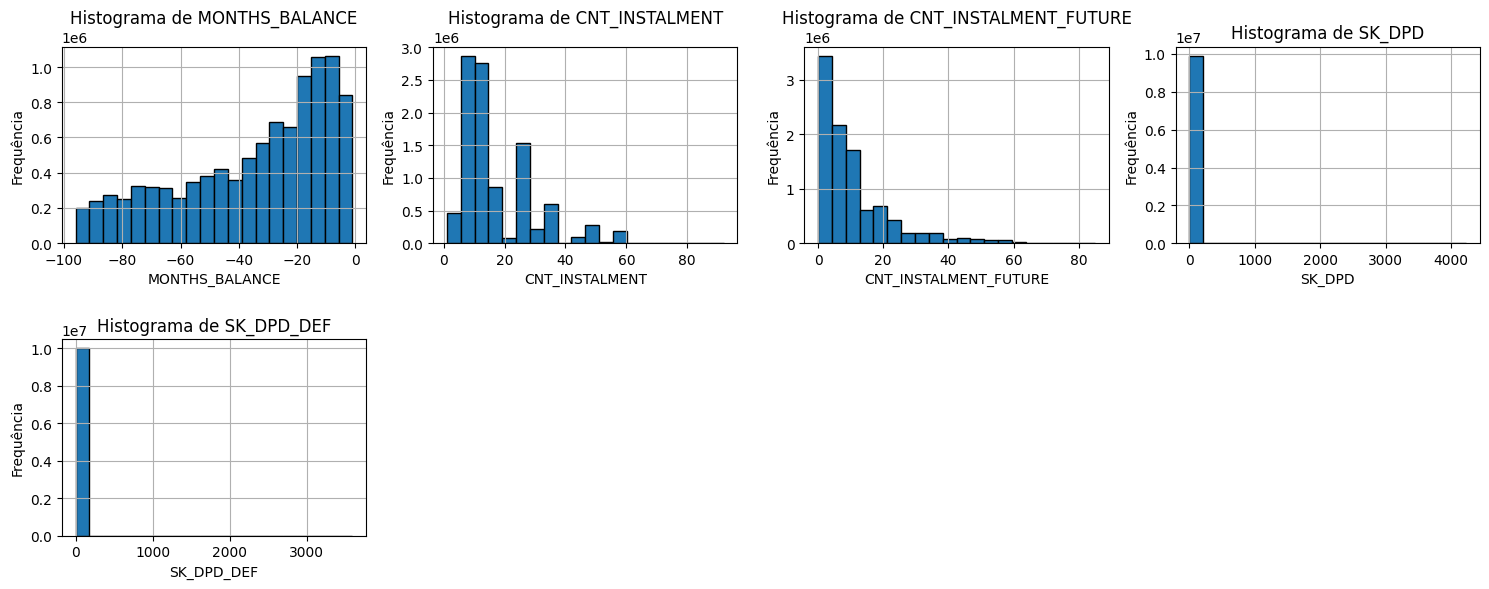

In [97]:
import math

cols = ['MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

num_cols = len(cols)
num_rows = math.ceil(num_cols / 4)  # Ajuste para 4 colunas por linha
plt.figure(figsize=(15, num_rows * 3))

# Criando os histogramas
for i, column in enumerate(cols, 1):
    plt.subplot(num_rows, 4, i)
    df[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- Agrupando os dados pelo SK_ID_CRR. As colunas foram escolhidas conforme a matriz de confusão.
    - MONTHS_BALANCE (0.02)
    - SK_DPD (0.02)
    - SK_DPD_DEF (0.02)


In [98]:
df2 = df.groupby('SK_ID_CURR').agg({
       'MONTHS_BALANCE':'median',
       'SK_DPD' :'median',
       'SK_DPD_DEF' :'median'
}).reset_index()

In [99]:
df2.head(10)

,SK_ID_CURR,MONTHS_BALANCE,SK_DPD,SK_DPD_DEF
0,100001,-57.0,0.0,0.0
1,100002,-10.0,0.0,0.0
2,100003,-26.5,0.0,0.0
3,100004,-25.5,0.0,0.0
4,100005,-20.0,0.0,0.0
5,100006,-8.0,0.0,0.0
6,100007,-27.5,0.0,0.0
7,100008,-44.0,45.0,0.0
8,100009,-23.5,0.0,0.0
9,100010,-30.0,0.0,0.0


In [100]:
df_merge = df_merge.merge(df2, on='SK_ID_CURR', how='left')
reduce_mem_usage(df_merge)

Memory usage after optimization is: 16.83 MB
Decreased by 4.7%


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_BALANCE,AMT_DRAWINGS_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,MONTHS_BALANCE_y,SK_DPD,SK_DPD_DEF
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,-1709.0,-1715.0,-57.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,-586.0,-585.0,-20.0,0.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,-1383.0,-1383.0,-21.5,0.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,7431.299805,5021.009766,6750.00000,7311.330078,7311.330078,-812.0,-812.0,-44.0,0.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,-622.0,-634.0,-21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,NaN,NaN,NaN,NaN,NaN,-623.0,-631.0,-20.5,0.0,0.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,-592.0,-600.0,-20.0,0.0,0.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,NaN,NaN,NaN,NaN,NaN,-701.0,-762.0,-77.0,0.0,0.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,NaN,NaN,NaN,NaN,NaN,-426.0,-438.0,-16.0,0.0,0.0


### previous_application.csv

In [101]:
df = pd.read_csv('.\\data\\previous_application.csv')
reduce_mem_usage(df)

Memory usage after optimization is: 309.01 MB
Decreased by 34.5%


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290039,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855469,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.519531,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [102]:
colunas_numericas = df.select_dtypes(include=['number']).columns # Identificando variáveis numéricas
colunas_categoricas = df.select_dtypes(exclude=['number']).columns # Identificando variáveis categóricas (excluindo numéricas)

In [103]:
lista = valores_nulos_por_cols(df).sort_values(by='porcentagem_nulos', ascending=False)
lista


Total de colunas com valores nulos: 16


,nome_col,quantidade_nulos,porcentagem_nulos
6,RATE_INTEREST_PRIVILEGED,1664263,99.644
5,RATE_INTEREST_PRIMARY,1664263,99.644
2,AMT_DOWN_PAYMENT,895844,53.636
4,RATE_DOWN_PAYMENT,895844,53.636
7,NAME_TYPE_SUITE,820405,49.120
13,DAYS_LAST_DUE,673065,40.298
10,DAYS_FIRST_DRAWING,673065,40.298
11,DAYS_FIRST_DUE,673065,40.298
14,DAYS_TERMINATION,673065,40.298
15,NFLAG_INSURED_ON_APPROVAL,673065,40.298


In [104]:
lista = list(lista['nome_col'].loc[lista['porcentagem_nulos'] > 10])
lista.append('SK_ID_PREV')
df.drop(columns=lista, inplace=True)

In [105]:
colunas_numericas = df.select_dtypes(include=['number']).columns # Identificando variáveis numéricas
colunas_categoricas = df.select_dtypes(exclude=['number']).columns # Identificando variáveis categóricas (excluindo numéricas)

- Analise variaveis vategoricas

Como os ids podem se repetir as colunas categoricas podem ter respostas diferentes, portanto não haverá transformações.

In [106]:
for col in colunas_categoricas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: NAME_CONTRACT_TYPE
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: count, dtype: float64 

Coluna: WEEKDAY_APPR_PROCESS_START
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: count, dtype: float64 

Coluna: FLAG_LAST_APPL_PER_CONTRACT
Y    99.49258
N     0.50742
Name: count, dtype: float64 

Coluna: NAME_CASH_LOAN_PURPOSE
XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education       

- Analise variaveis numericas

In [107]:
# colunas_numericas = df.select_dtypes(include=['number']).columns# Identificando variáveis numéricas fora a coluna SK_ID_CURR

In [108]:
for col in colunas_numericas:
    print(f'Coluna: {df[col].value_counts() * 100 /len(df)} \n')

Coluna: SK_ID_CURR
187868    0.004610
265681    0.004371
173680    0.004311
242412    0.004071
206783    0.004011
            ...   
353874    0.000060
123460    0.000060
364512    0.000060
195648    0.000060
168750    0.000060
Name: count, Length: 338857, dtype: float64 

Coluna: AMT_APPLICATION
0.000000         23.494115
45000.000000      2.863765
225000.000000     2.607031
135000.000000     2.435496
450000.000000     2.329342
                   ...    
102338.187500     0.000060
121124.156250     0.000060
304051.500000     0.000060
53946.226562      0.000060
28365.794922      0.000060
Name: count, Length: 93885, dtype: float64 

Coluna: AMT_CREDIT
0.000000         20.163165
45000.000000      2.098593
225000.000000     1.262952
450000.000000     1.194697
135000.000000     1.120814
                   ...    
239521.500000     0.000060
24651.900391      0.000060
503482.500000     0.000060
222070.500000     0.000060
164845.796875     0.000060
Name: count, Length: 86802, dtype: float64 


In [109]:
colunas_numericas

Index(['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'SELLERPLACE_AREA'],
      dtype='object')

- Analise das variaveis com uma melhor correlação absoluta com a coluna Target

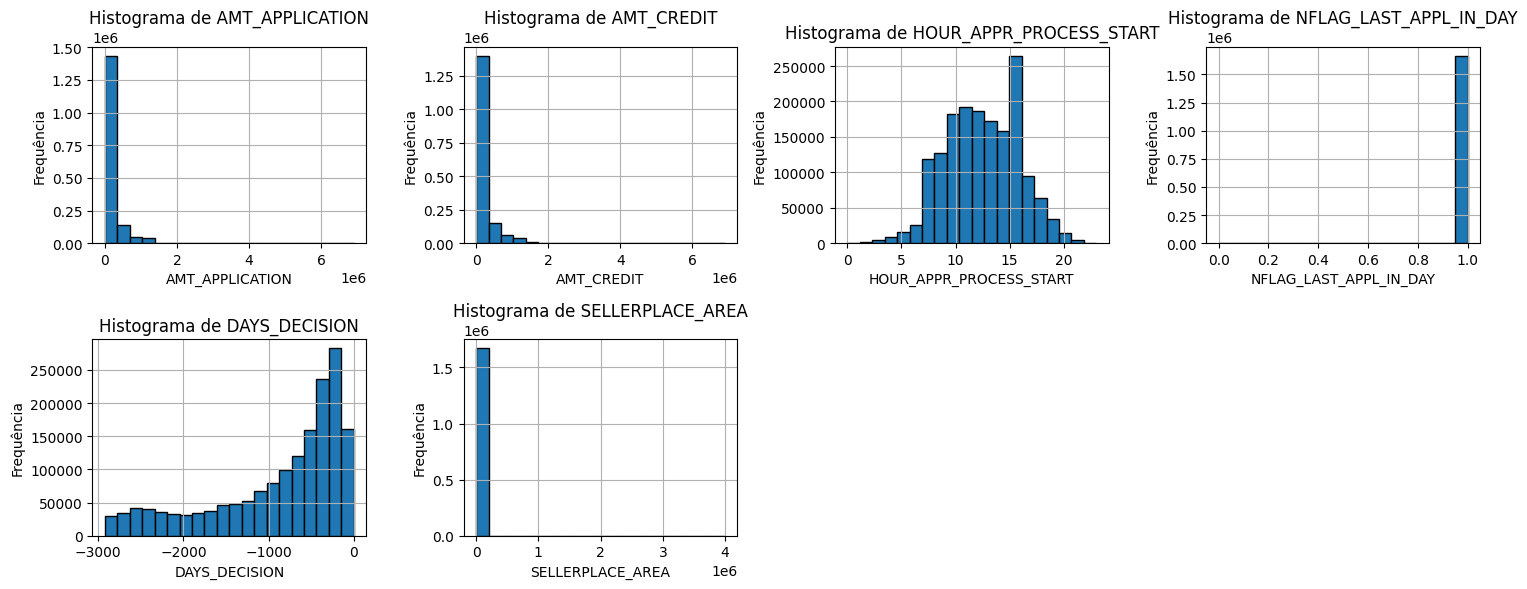

In [110]:
import math

cols = ['AMT_APPLICATION', 'AMT_CREDIT',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'SELLERPLACE_AREA']

num_cols = len(cols)
num_rows = math.ceil(num_cols / 4)  # Ajuste para 4 colunas por linha
plt.figure(figsize=(15, num_rows * 3))

# Criando os histogramas
for i, column in enumerate(cols, 1):
    plt.subplot(num_rows, 4, i)
    df[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- Agrupando os dados pelo SK_ID_CRR. As colunas foram escolhidas conforme a matriz de confusão.
    - DAYS_DECISION (0.04)
    - HOUR_APPR_PROCESS_START (-0.03)


In [111]:
df2 = df.groupby('SK_ID_CURR').agg({
       'DAYS_DECISION':'median',
       'HOUR_APPR_PROCESS_START' :'median',
}).reset_index()

In [112]:
df2.head(10)

,SK_ID_CURR,DAYS_DECISION,HOUR_APPR_PROCESS_START
0,100001,-1740.0,13.0
1,100002,-606.0,9.0
2,100003,-828.0,15.0
3,100004,-815.0,5.0
4,100005,-536.0,10.5
5,100006,-181.0,15.0
6,100007,-986.5,13.0
7,100008,-639.0,10.0
8,100009,-449.0,13.0
9,100010,-1070.0,16.0


In [113]:
df_merge = df_merge.merge(df2, on='SK_ID_CURR', how='left')
reduce_mem_usage(df_merge)

Memory usage after optimization is: 17.01 MB
Decreased by 3.2%


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,MONTHS_BALANCE_y,SK_DPD,SK_DPD_DEF,DAYS_DECISION,HOUR_APPR_PROCESS_START_y
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,-1709.0,-1715.0,-57.0,0.0,0.0,-1740.0,13.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,-586.0,-585.0,-20.0,0.0,0.0,-536.0,10.5
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.00000,0.000000,0.000000,-1383.0,-1383.0,-21.5,0.0,0.0,-564.5,14.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,6750.00000,7311.330078,7311.330078,-812.0,-812.0,-44.0,0.0,0.0,-998.0,11.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,-622.0,-634.0,-21.0,0.0,0.0,-466.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,NaN,NaN,NaN,-623.0,-631.0,-20.5,0.0,0.0,-683.0,14.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,-592.0,-600.0,-20.0,0.0,0.0,-1494.0,11.5
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,NaN,NaN,NaN,-701.0,-762.0,-77.0,0.0,0.0,-461.0,20.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,NaN,NaN,NaN,-426.0,-438.0,-16.0,0.0,0.0,-1623.0,15.0


# Criação dos datasets

In [114]:
## df_merge.to_csv('conjunto_de_treino.csv', index=False)
df_merge.to_csv('conjunto_de_testes.csv', index=False)

In [ ]:
# df = pd.read_csv('conjunto_de_treino.csv')

In [ ]:
# df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,MONTHS_BALANCE_y,SK_DPD,SK_DPD_DEF,DAYS_DECISION,HOUR_APPR_PROCESS_START_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,-295.0,-312.0,-10.0,0.0,0.0,-606.0,9.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,-797.0,-806.0,-26.5,0.0,0.0,-828.0,15.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,-754.0,-763.0,-25.5,0.0,0.0,-815.0,5.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,-206.0,-211.0,-8.0,0.0,0.0,-181.0,15.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,-851.0,-852.5,-27.5,0.0,0.0,-986.5,13.0


In [ ]:
# df.shape

(307511, 142)

In [115]:
df = pd.read_csv('conjunto_de_testes.csv')

In [117]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,MONTHS_BALANCE_y,SK_DPD,SK_DPD_DEF,DAYS_DECISION,HOUR_APPR_PROCESS_START_y
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,-1709.0,-1715.0,-57.0,0.0,0.0,-1740.0,13.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,-586.0,-585.0,-20.0,0.0,0.0,-536.0,10.5
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.00,0.00,-1383.0,-1383.0,-21.5,0.0,0.0,-564.5,14.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,6750.0,7311.33,7311.33,-812.0,-812.0,-44.0,0.0,0.0,-998.0,11.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,-622.0,-634.0,-21.0,0.0,0.0,-466.0,5.5


In [118]:
df.shape

(48744, 141)

In [119]:
df2 = pd.read_csv('.//data//application_test.csv')

In [120]:
df2.shape

(48744, 121)